# DSCI 503 - Homework 07
### Sean Kilfoy

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split

## Problem 1: NYC Restaurants Dataset

In [2]:
nyc = pd.read_csv('nyc.txt', sep='\t')

nyc.head(10)

,Price,Food,Decor,Service,Wait,East
0,43,22,18,20,36,0
1,32,20,19,19,22,0
2,34,21,13,18,20,0
3,41,20,20,17,25,0
4,54,24,19,21,32,0
5,52,22,22,21,15,0
6,34,22,16,21,25,0
7,34,20,18,21,21,1
8,39,22,19,22,23,1
9,44,21,17,19,27,1


In [3]:
X1 = nyc.iloc[:, 1:].values
y1 = nyc.iloc[:, 0].values

X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X1, y1, test_size=0.2, random_state=1)

print("Training Features Shape: ", X_train_1.shape)
print("Test Features Shape:     ", X_test_1.shape)


Training Features Shape:  (134, 5)
Test Features Shape:      (34, 5)


In [4]:
nyc_mod = LinearRegression()
nyc_mod.fit(X_train_1, y_train_1)

print("Intercept:   ", np.round(nyc_mod.intercept_, 4))
print("Coefficients:", np.round(nyc_mod.coef_, 4))

Intercept:    -23.7554
Coefficients: [ 1.5569  2.007  -0.2544  0.092   2.6324]


In [5]:
train_r2 = nyc_mod.score(X_train_1, y_train_1)
test_r2 = nyc_mod.score(X_test_1, y_test_1)

print("Training r-Squared:", np.round(train_r2, 4))
print("Testing r-Squared: ", np.round(test_r2, 4))

Training r-Squared: 0.6306
Testing r-Squared:  0.6245


In [6]:
test_pred_1 = nyc_mod.predict(X_test_1)

print("Observed Prices: ", y_test_1[:10])
print("Estimated Prices:", np.round(test_pred_1[:10], 2))

Observed Prices:  [33 45 54 38 22 47 38 51 46 47]
Estimated Prices: [39.2  38.09 49.35 39.26 19.72 47.4  36.85 50.07 48.26 43.01]


In [7]:
nyc_new = pd.DataFrame({'Food': [22, 18, 25], 'Decor': [12, 19, 22], 'Service': [20, 22, 18], 'Wait': [15, 34, 36], 'East': [0, 1, 0]}).values
new_pred_1 = nyc_mod.predict(nyc_new)
print("Estimated Prices:", np.round(new_pred_1, 2))


Estimated Prices: [30.87 42.57 58.06]


## Problem 2: Diamonds Dataset

In [8]:
diamonds = pd.read_csv('diamonds.txt', sep='\t')

diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [9]:
diamonds['ln_carat'] = np.log(diamonds['carat'])
diamonds['ln_price'] = np.log(diamonds['price'])

diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,ln_carat,ln_price
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,-1.469676,5.786897
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,-1.560648,5.786897
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,-1.469676,5.789960
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,-1.237874,5.811141
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,-1.171183,5.814131


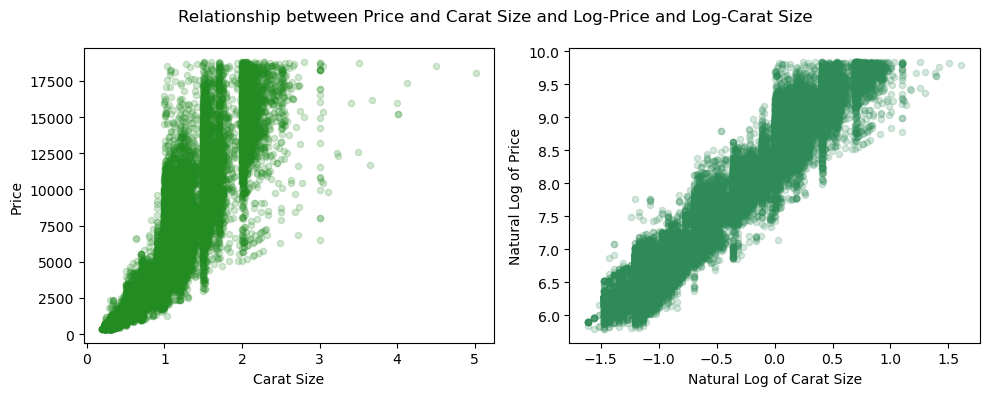

In [10]:
fig, axs = plt.subplots(1, 2, figsize=[10,4])
fig.suptitle('Relationship between Price and Carat Size and Log-Price and Log-Carat Size')
axs[0].scatter(diamonds['carat'],
               diamonds['price'],
               s=20,
               alpha=0.2,
               c='forestgreen')
axs[0].set_xlabel('Carat Size')
axs[0].set_ylabel('Price')
axs[1].scatter(diamonds['ln_carat'],
               diamonds['ln_price'],
               s=20,
               alpha=0.2,
               c='seagreen')
axs[1].set_xlabel('Natural Log of Carat Size')
axs[1].set_ylabel('Natural Log of Price')
plt.tight_layout()
plt.show()

In [11]:
X2 = diamonds[['ln_carat']].values
y2 = diamonds['ln_price'].values

X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X2, y2, test_size=0.1, random_state=1)

print("Training Features Shape:", X_train_2.shape)
print("Test Features Shape:    ", X_test_2.shape)


Training Features Shape: (48546, 1)
Test Features Shape:     (5394, 1)


In [12]:
dia_mod = LinearRegression()
dia_mod.fit(X_train_2, y_train_2)

print("Intercept:    ", dia_mod.intercept_.round(4))
print("Coefficients:", dia_mod.coef_.round(4))

Intercept:     8.4483
Coefficients: [1.6749]


In [13]:
train_r2 = dia_mod.score(X_train_2, y_train_2)
test_r2 = dia_mod.score(X_test_2, y_test_2)

print("Training r-Squared:", train_r2.round(6))
print("Testing r-Squared: ", test_r2.round(6))

Training r-Squared: 0.933005
Testing r-Squared:  0.932825


In [14]:
test_pred_2 = dia_mod.predict(X_test_2)
observed_prices = np.exp(y_test_2[:10])
estimated_prices = np.round(np.exp(test_pred_2[:10]), 4)
print('Observed Prices:', observed_prices, sep='\n')
print('Estimated Prices:', estimated_prices, sep='\n')

Observed Prices:
[ 564. 5914. 2562.  537. 5964.  984. 5247.  611. 9645. 1162.]
Estimated Prices:
[ 728.7751 6333.9204 2095.6554  766.1414 6333.9204 1611.5009 5309.2351
 1048.3085 9204.2879  804.257 ]


In [15]:
diamonds_new = np.log(np.array([0.5, 1.0, 1.5, 2.0, 2.5, 3.0]).reshape(-1,1))
new_pred_2 = dia_mod.predict(diamonds_new)
predicted_prices = np.round(np.exp(new_pred_2), 2)

print('Estimated Prices:', predicted_prices, sep='\n')


Estimated Prices:
[ 1461.66  4667.13  9204.29 14902.32 21655.67 29389.67]


## Problem 3: Heart Disease Dataset

In [16]:
hd = pd.read_csv('heart_disease.txt', sep='\t')
hd.head(10)

,age,sex,chest_pain_type,resting_bp,serum_chol,fasting_blood_sugar,electrocardio,max_heart_rate,exercise_induced_angina,oldpeak,slope,major_vessels,thal,heart_disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,2
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,1
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,2
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,1
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,1
5,65,1,4,120,177,0,0,140,0,0.4,1,0,7,1
6,56,1,3,130,256,1,2,142,1,0.6,2,1,6,2
7,59,1,4,110,239,0,2,142,1,1.2,2,1,7,2
8,60,1,4,140,293,0,2,170,0,1.2,2,2,7,2
9,63,0,4,150,407,0,2,154,0,4.0,2,3,7,2


In [17]:
X3 = hd.iloc[:, :-1].values
y3 = hd.iloc[:, -1].values
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X3, y3, test_size=0.2, random_state=1, stratify=y3)
print("Training Features Shape:", X_train_3.shape)
print("Test Features Shape:    ", X_test_3.shape)


Training Features Shape: (216, 13)
Test Features Shape:     (54, 13)


In [18]:
hd_mod = LogisticRegression(solver='lbfgs', penalty='none', max_iter=1000)
hd_mod.fit(X_train_3, y_train_3)

print("Intercept:", np.round(hd_mod.intercept_[0], 4), sep='\t')
print("Coefficients:")

for i in range(len(hd.columns)-1):
    print(hd.columns[i], hd_mod.coef_[0][i], sep=':\t')

Intercept:	-9.801
Coefficients:
age:	-0.03380696734943714
sex:	1.8135794836606132
chest_pain_type:	0.7501139928575753
resting_bp:	0.025143326602908554
serum_chol:	0.014408929996552881
fasting_blood_sugar:	-0.7065071138086643
electrocardio:	0.3243683758840213
max_heart_rate:	-0.019720591267573813
exercise_induced_angina:	0.7412642922037822
oldpeak:	0.3673860277923983
slope:	0.27433120965034274
major_vessels:	1.078822927028145
thal:	0.3829686898320993


In [19]:
train_score = hd_mod.score(X_train_3, y_train_3)
test_score = hd_mod.score(X_test_3, y_test_3)
print("Training Accuracy:", train_score.round(4))
print("Testing Accuracy: ", test_score.round(4))


Training Accuracy: 0.8519
Testing Accuracy:  0.8148


In [20]:
test_pred_3 = hd_mod.predict(X_test_3)
print("Observed Labels: ", y_test_3[:20])
print("Predicted Labels:", test_pred_3[:20])

Observed Labels:  [2 2 2 1 1 2 1 1 2 1 2 1 1 1 2 1 1 1 2 1]
Predicted Labels: [2 2 2 1 1 2 1 1 2 1 2 1 1 1 2 1 1 1 2 1]


In [21]:
test_proba_3 = hd_mod.predict_proba(X_test_3)[:10]
test_proba_df = pd.DataFrame(test_proba_3, columns=['1', '2'])
test_proba_df

,1,2
0,0.011588,0.988412
1,0.042855,0.957145
2,0.039705,0.960295
3,0.847798,0.152202
4,0.874299,0.125701
5,0.051805,0.948195
6,0.919850,0.080150
7,0.944686,0.055314
8,0.009846,0.990154
9,0.996746,0.003254


## Problem 4: Gapminder Dataset

In [22]:
gm = pd.read_csv('gapminder_data.txt', sep='\t')
gm18 = gm[gm['year'] == 2018]
gm18.head(10)

,country,year,continent,population,life_exp,gdp_per_cap,gini
40112,Afghanistan,2018,asia,36400000,58.7,1870,36.8
40113,Albania,2018,europe,2930000,78.0,12400,29.0
40114,Algeria,2018,africa,42000000,77.9,13700,27.6
40115,Angola,2018,africa,30800000,65.2,5850,42.6
40116,Antigua and Barbuda,2018,americas,103000,77.6,21000,40.0
40117,Argentina,2018,americas,44700000,77.0,18900,42.4
40118,Armenia,2018,europe,2930000,76.0,8660,32.6
40119,Australia,2018,asia,24800000,82.9,45800,32.3
40120,Austria,2018,europe,8750000,81.8,44600,30.5
40121,Azerbaijan,2018,europe,9920000,72.3,16600,32.4


In [23]:
X4 = gm18[['life_exp', 'gdp_per_cap', 'gini']].values
y4 = gm18['continent'].values
X_train_4, X_test_4, y_train_4, y_test_4 = train_test_split(X4,
                                                            y4,
                                                            test_size=0.3,
                                                            random_state=1,
                                                            stratify=y4)
print("Training Features Shape:", X_train_4.shape)
print("Test Features Shape:    ", X_test_4.shape)


Training Features Shape: (128, 3)
Test Features Shape:     (56, 3)


In [24]:
gm_mod = LogisticRegression(solver='lbfgs',
                            penalty='none',
                            multi_class='multinomial',
                            max_iter=666)
gm_mod.fit(X_train_4, y_train_4)

print("Intercept:   ", gm_mod.intercept_)
print("Coefficients:", gm_mod.coef_, sep='\n')

Intercept:    [ 0.00206206 -0.00474954  0.00333784 -0.00065036]
Coefficients:
[[-8.83756448e-02 -1.02856964e-04  2.01053456e-01]
 [-8.63154959e-02  3.30583699e-05  1.59921897e-01]
 [ 1.95506117e-02  2.94566725e-05 -2.37138157e-02]
 [ 1.55140529e-01  4.03419217e-05 -3.37261537e-01]]


In [25]:
train_accuracy = gm_mod.score(X_train_4, y_train_4)
test_accuracy = gm_mod.score(X_test_4, y_test_4)
print("Training Accuracy:", train_accuracy)
print("Testing Accuracy: ", test_accuracy.round(3))

Training Accuracy: 0.625
Testing Accuracy:  0.589


In [26]:
test_pred_4 = gm_mod.predict(X_test_4)
print("Observed Labels:", y_test_4[:8], sep='\n')
print("Predicted Labels:", test_pred_4[:8], sep='\n')

Observed Labels:
['americas' 'asia' 'asia' 'asia' 'africa' 'europe' 'asia' 'europe']
Predicted Labels:
['asia' 'europe' 'africa' 'asia' 'europe' 'europe' 'africa' 'europe']


In [27]:
gm_new = pd.DataFrame({'life_exp': [75, 75, 75, 75, 75, 75],
                       'gdp_per_cap': [5000, 5000, 5000, 20000, 20000, 20000],
                       'gini': [30, 40, 50, 30, 40, 50]}).values
gm_proba = gm_mod.predict_proba(gm_new)
gm_proba_df = pd.DataFrame(gm_proba, columns=['africa',
                                              'americas',
                                              'asia',
                                              'europe'])
gm_proba_df.round(3)

,africa,americas,asia,europe
0,0.038,0.026,0.288,0.649
1,0.433,0.191,0.343,0.034
2,0.726,0.212,0.061,0.000
3,0.005,0.025,0.265,0.705
4,0.092,0.313,0.533,0.061
5,0.259,0.582,0.158,0.001


- Country 0 is most likely in Europe.
- Country 1 is most likely in Africa.
- Country 2 is most likely in Africa.
- Country 3 is most likely in Europe.
- Country 4 is most likely in Asia.
- Country 5 is most likely in Americas.